In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib

In [2]:
print pd.__version__

0.18.1


In [3]:
# Download pollutant data from EPA website if not available locally
# Ozone (44201), SO2 (42401), CO (42101), NO2 (42602)
# http://aqsdr1.epa.gov/aqsweb/aqstmp/airdata/hourly_44201_2017.zip

speciesNames    = {'Ozone':'44201','SO2':'42401','CO':'42101','NO2':'42602'}
year            = '2016'

# Create hourly species file name
hourlyFileName  = 'hourly_' + speciesNames['Ozone'] + '_' + year + '.zip'

# Save it in the year directory
if not os.path.exists(year):
    os.mkdir(year)

# Download only if the file does not exist
fullHrFile = os.path.join(year,hourlyFileName)
if not os.path.exists(fullHrFile):
    urlAddress = 'http://aqsdr1.epa.gov/aqsweb/aqstmp/airdata/' + hourlyFileName
    print 'Downloading %s from %s'%(fullHrFile,urlAddress)
    urllib.urlretrieve(urlAddress,fullHrFile)
else:
    print 'Found ',fullHrFile

In [4]:
# Read zipped csv file into o3 dataframe
o3 = pd.read_csv('2016\\hourly_44201_2016.zip', compression='zip', sep=',', quotechar='"')
print o3.head()

C:\Users\Biswanath\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1            3        10           44201    1  30.497478   
1           1            3        10           44201    1  30.497478   
2           1            3        10           44201    1  30.497478   
3           1            3        10           44201    1  30.497478   
4           1            3        10           44201    1  30.497478   

   Longitude  Datum Parameter Name  Date Local         ...           \
0 -87.880258  NAD83          Ozone  2016-03-01         ...            
1 -87.880258  NAD83          Ozone  2016-03-01         ...            
2 -87.880258  NAD83          Ozone  2016-03-01         ...            
3 -87.880258  NAD83          Ozone  2016-03-01         ...            
4 -87.880258  NAD83          Ozone  2016-03-01         ...            

    Units of Measure    MDL Uncertainty  Qualifier Method Type  Method Code  \
0  Parts per million  0.005         NaN        NaN         FE

In [5]:
# Print the first row
print o3.iloc[0]


State Code                                       1
County Code                                      3
Site Num                                        10
Parameter Code                               44201
POC                                              1
Latitude                                   30.4975
Longitude                                 -87.8803
Datum                                        NAD83
Parameter Name                               Ozone
Date Local                              2016-03-01
Time Local                                   15:00
Date GMT                                2016-03-01
Time GMT                                     21:00
Sample Measurement                           0.041
Units of Measure                 Parts per million
MDL                                          0.005
Uncertainty                                    NaN
Qualifier                                      NaN
Method Type                                    FEM
Method Code                    

In [11]:
# Create a new dataframe for New Jersey
nj = o3.loc[o3['State Name']=='New Jersey']

In [12]:
# Print first 25 rows from NJ for the listed columns
print nj.iloc[:25][['Latitude','Longitude','Date Local','Time Local','Sample Measurement']]

          Latitude  Longitude  Date Local Time Local  Sample Measurement
5459246  39.464872 -74.448736  2016-01-01      00:00               0.023
5459247  39.464872 -74.448736  2016-01-01      01:00               0.023
5459248  39.464872 -74.448736  2016-01-01      02:00               0.021
5459249  39.464872 -74.448736  2016-01-01      04:00               0.022
5459250  39.464872 -74.448736  2016-01-01      05:00               0.022
5459251  39.464872 -74.448736  2016-01-01      06:00               0.022
5459252  39.464872 -74.448736  2016-01-01      07:00               0.021
5459253  39.464872 -74.448736  2016-01-01      08:00               0.021
5459254  39.464872 -74.448736  2016-01-01      09:00               0.023
5459255  39.464872 -74.448736  2016-01-01      10:00               0.026
5459256  39.464872 -74.448736  2016-01-01      11:00               0.027
5459257  39.464872 -74.448736  2016-01-01      12:00               0.026
5459258  39.464872 -74.448736  2016-01-01      13:0

In [79]:
print nj['Sample Measurement'].max()

0.103


In [22]:
# Create a datetime string with local date and time and convert Pandas datetime type
nj.loc[:,'DateStr'] = pd.to_datetime(nj['Date Local'] + ' ' + nj['Time Local'])
print nj['DateStr'].head()

5459246   2016-01-01 00:00:00
5459247   2016-01-01 01:00:00
5459248   2016-01-01 02:00:00
5459249   2016-01-01 04:00:00
5459250   2016-01-01 05:00:00
Name: DateStr, dtype: datetime64[ns]


In [23]:
nj.loc[:,'Days_frac'] = nj['DateStr'].dt.dayofyear +  nj['DateStr'].dt.hour/24.
nj['Days_frac'].head(25)

5459246    1.000000
5459247    1.041667
5459248    1.083333
5459249    1.166667
5459250    1.208333
5459251    1.250000
5459252    1.291667
5459253    1.333333
5459254    1.375000
5459255    1.416667
5459256    1.458333
5459257    1.500000
5459258    1.541667
5459259    1.583333
5459260    1.625000
5459261    1.666667
5459262    1.708333
5459263    1.750000
5459264    1.791667
5459265    1.833333
5459266    1.875000
5459267    1.916667
5459268    1.958333
5459269    2.000000
5459270    2.041667
Name: Days_frac, dtype: float64

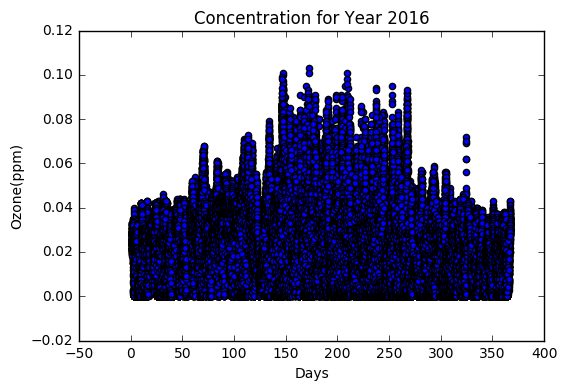

In [78]:
# Plot O3 values vs. day of the year
plt.scatter(nj['Days_frac'],nj['Sample Measurement'])
plt.xlabel('Days')
plt.ylabel('Ozone(ppm)')
plt.title('Concentration for Year 2016')
plt.show()

In [25]:
print nj.iloc[-1]

State Code                                      34
County Code                                     41
Site Num                                         7
Parameter Code                               44201
POC                                              1
Latitude                                   40.9246
Longitude                                 -75.0678
Datum                                        WGS84
Parameter Name                               Ozone
Date Local                              2016-12-31
Time Local                                   23:00
Date GMT                                2017-01-01
Time GMT                                     04:00
Sample Measurement                           0.027
Units of Measure                 Parts per million
MDL                                          0.005
Uncertainty                                    NaN
Qualifier                                      NaN
Method Type                                    FEM
Method Code                    

In [26]:
njDaily = nj.groupby('Date Local').agg({'Sample Measurement': lambda x: sum(x)/len(x)})
njDaily.head()

,Sample Measurement
Date Local,
2016-01-01,0.026859
2016-01-02,0.021708
2016-01-03,0.018962
2016-01-04,0.026395
2016-01-05,0.019120


In [57]:
# Use the index value (date) to day of the year
dayofyr = pd.to_datetime(njDaily.index.values).dayofyear
print dayofyr

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

In [71]:
# Get dayofyr for every 15th of the month
months = dayofyr[pd.to_datetime(njDaily.index.values).day == 15]
print months

[ 15  46  75 106 136 167 197 228 259 289 320 350]


In [72]:
# Create function to return month name from day of the year
import datetime
def getMonthName(day):
    d = datetime.datetime.strptime('{} {}'.format(day, year),'%j %Y')
    return d.strftime('%b')
print getMonthName(32)

Feb


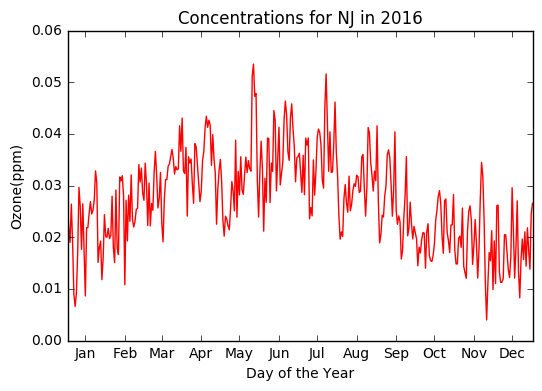

In [77]:
# Plot the Ozone concentration (daily average) with day of the year
import matplotlib.ticker as mtick
plt.plot(dayofyr,njDaily['Sample Measurement'],c='red')
plt.xlim([1,dayofyr.max()])
plt.xlabel('Month')
plt.ylabel('Ozone(ppm)')
plt.title('Concentrations for NJ in 2016')
plt.gca().xaxis.set_major_locator(mtick.FixedLocator(months)) # Set tick locations
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x,p:getMonthName(x)))
plt.show()